In [1]:
from pathlib import Path
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

ROOT = Path.cwd().parent
sys.path.append(ROOT.as_posix())

from src.data import MCSimData

sns.set_theme()
plt.rcParams['text.usetex'] = True

In [3]:
VBF_diphoton = MCSimData(ROOT / 'data' / 'VBF_diphoton.h5')
GGF_diphoton = MCSimData(ROOT / 'data' / 'GGF_diphoton.h5')

VBF_zz4l = MCSimData(ROOT / 'data' / 'VBF_zz4l.h5')
GGF_zz4l = MCSimData(ROOT / 'data' / 'GGF_zz4l.h5')

VBF_za2l = MCSimData(ROOT / 'data' / 'VBF_za2l.h5')
GGF_za2l = MCSimData(ROOT / 'data' / 'GGF_za2l.h5')

The `num_data` argument is retrieved from the number of data with $\mathcal{L} = 3000~\mathrm{fb}^{-1}$.

In [4]:
def numpy_to_pandas(jet_flavor: dict[str, np.ndarray], channel: str, num_data: int) -> pd.DataFrame:
    """Convert a dictionary of numpy arrays to a pandas DataFrame."""
    flavors = ['2q0g', '1q1g', '0q2g']
    df = pd.DataFrame({
        'Jet Flavor': flavors,
        'Count': [jet_flavor[flavor][:num_data].sum() for flavor in flavors]
    })
    df['hue'] = channel
    return df

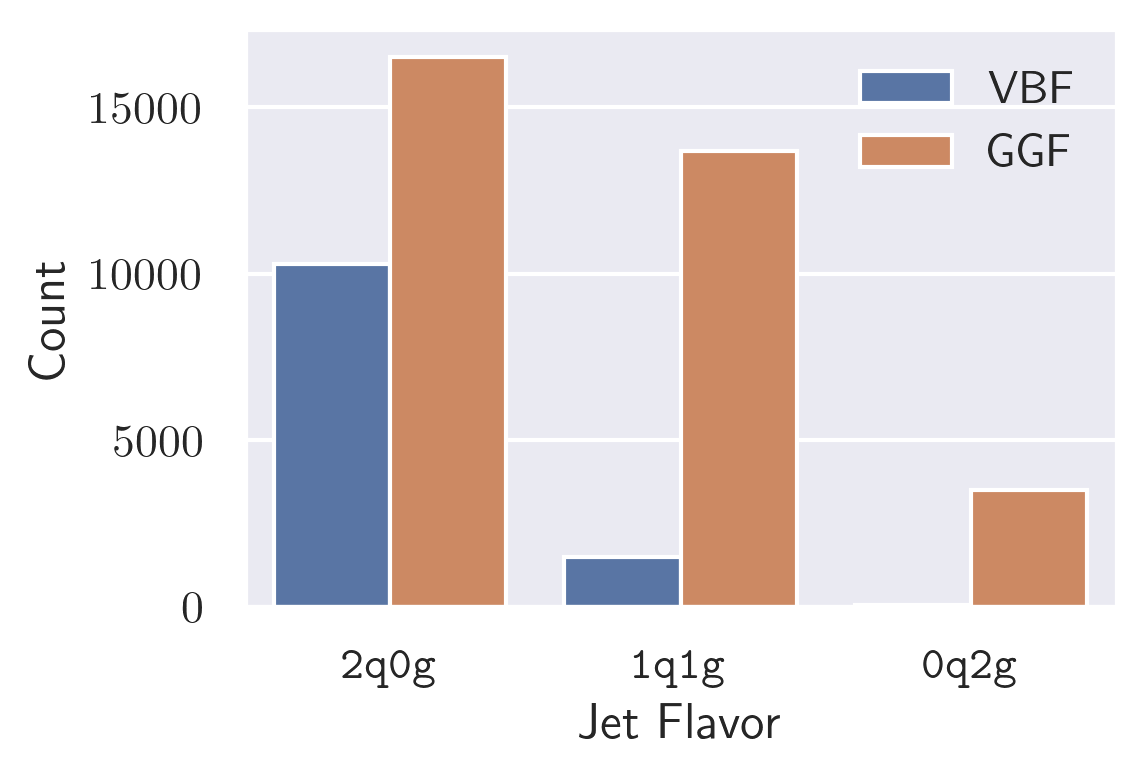

In [5]:
# $H\to\gamma\gamma$

VBF_df = numpy_to_pandas(VBF_diphoton.jet_flavor, 'VBF', num_data=11825)
GGF_df = numpy_to_pandas(GGF_diphoton.jet_flavor, 'GGF', num_data=33693)
df = pd.concat([VBF_df, GGF_df])

fig = plt.figure(figsize=(3.75, 2.5), dpi=300)
ax = sns.barplot(data=df, x="Jet Flavor", y="Count", hue="hue", order = ['2q0g', '1q1g', '0q2g'])

mapped = [r"\texttt{2q0g}", r"\texttt{1q1g}", r"\texttt{0q2g}"]
ax.set_xticks(range(len(mapped)))
ax.set_xticklabels(mapped)

plt.legend(frameon=False)
plt.show()
fig.savefig(ROOT / 'figures' / 'jet-flavor_distribution_diphoton.pdf', bbox_inches='tight')

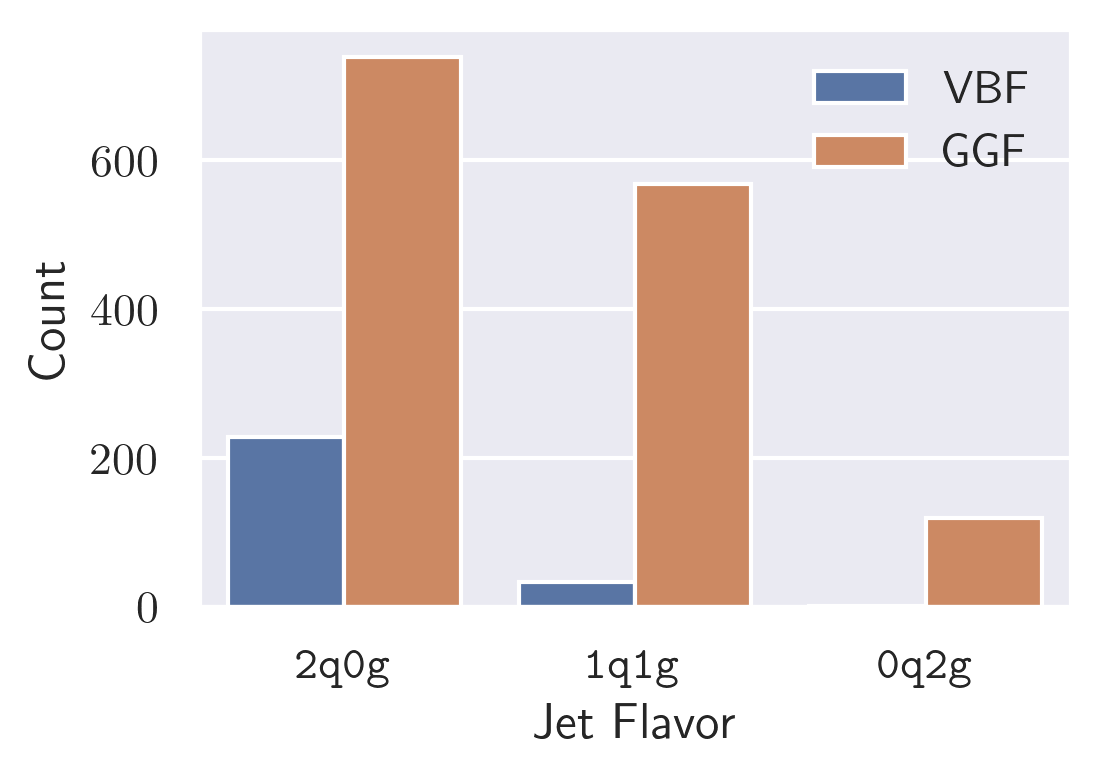

In [6]:
# $H\to ZZ\to 4l$

VBF_df = numpy_to_pandas(VBF_zz4l.jet_flavor, 'VBF', num_data=262)
GGF_df = numpy_to_pandas(GGF_zz4l.jet_flavor, 'GGF', num_data=1426)
df = pd.concat([VBF_df, GGF_df])

fig = plt.figure(figsize=(3.75, 2.5), dpi=300)
ax = sns.barplot(data=df, x="Jet Flavor", y="Count", hue="hue", order = ['2q0g', '1q1g', '0q2g'])

mapped = [r"\texttt{2q0g}", r"\texttt{1q1g}", r"\texttt{0q2g}"]
ax.set_xticks(range(len(mapped)))
ax.set_xticklabels(mapped)

plt.legend(frameon=False)
plt.show()
fig.savefig(ROOT / 'figures' / 'jet-flavor_distribution_zz4l.pdf', bbox_inches='tight')